 # **Personal** **Expense** **Tracker** - **Analysis**

# Project - Personal Expense Tracker

"""  Objective: Create an effective expense tracking system that helps users monitor their financial habits.

Data Features: We'll explore the dataset to understand its columns—likely including transaction date, category, amount, and payment type.

Business Questions:
What spending categories account for the most significant expenses?
Are there trends in spending behavior over time?
Can we identify periods with unusual spikes in spending?"""


**1** Import the packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Set plot style
sns.set(color_codes=True)

**2** Loading the data

In [ ]:

# Load the dataset into a DataFrame
data_df = pd.read_csv('/content/Daily Household Transactions.csv')
data_df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


**3** Exploring and Inspecting the data


In [ ]:
#Checking the shape (number of rows and columns)
print("Dataset Shape:", data_df.shape)


Dataset Shape: (2461, 8)


Data types
It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [ ]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [ ]:
#fing out the data types of all the columns
data_df.dtypes

,0
Date,object
Mode,object
Category,object
Subcategory,object
Note,object
Amount,float64
Income/Expense,object
Currency,object


In [ ]:
#Adding the  summary statistics of your dataset here
print("\nSummary Statistics:")
print(data_df.describe())




Summary Statistics:
              Amount
count    2461.000000
mean     2751.145380
std     12519.615804
min         2.000000
25%        35.000000
50%       100.000000
75%       799.000000
max    250000.000000


In [ ]:
# Summary for all columns, including categorical
print("\nFull Summary (including categorical columns):")
print(data_df.describe(include='all'))


Full Summary (including categorical columns):
            Date                   Mode Category Subcategory        Note  \
count       2461                   2461     2461        1826        1940   
unique      1611                     12       50          90        1057   
top     1/1/2015  Saving Bank account 1     Food        Milk  milk 1lit    
freq          11                   1223      907         162          67   
mean         NaN                    NaN      NaN         NaN         NaN   
std          NaN                    NaN      NaN         NaN         NaN   
min          NaN                    NaN      NaN         NaN         NaN   
25%          NaN                    NaN      NaN         NaN         NaN   
50%          NaN                    NaN      NaN         NaN         NaN   
75%          NaN                    NaN      NaN         NaN         NaN   
max          NaN                    NaN      NaN         NaN         NaN   

               Amount Income/Expense Cur

In [ ]:
data_df.nunique()

,0
Date,1611
Mode,12
Category,50
Subcategory,90
Note,1057
Amount,550
Income/Expense,3
Currency,1


**4** Handling Missing Values

after Initial Inspection:
Understanding column names, data types, and basic structure.
Looking for potential issues like missing values, inconsistent data types, and duplicate rows.

In [ ]:
# Check for missing values
print("Missing values per column:")
print(data_df.isnull().sum())


Missing values per column:
Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64


In [ ]:
data_df = data_df[data_df['Amount'] > 0]

In [ ]:
# Now let us fill missing values
data_df['Subcategory'] = data_df['Subcategory'].fillna('Unknown')
data_df['Note'] = data_df['Note'].fillna('')

In [ ]:
# Strip extra spaces from text columns
data_df['Mode'] = data_df['Mode'].str.strip()
data_df['Category'] = data_df['Category'].str.strip()
data_df['Subcategory'] = data_df['Subcategory'].str.strip()
data_df['Income/Expense'] = data_df['Income/Expense'].str.strip()
data_df['Currency'] = data_df['Currency'].str.strip()

In [ ]:
# Removing rows with any NaN values
data_df = data_df.dropna()

import pandas as pd


# here, we are extracting day, month, year, and time from the 'Date' column

# Check if 'Date' column exists and has valid data
if 'Date' in data_df.columns:
    # Convert the 'Date' column to string type to handle mixed data types
    data_df['Date'] = data_df['Date'].astype(str)

    # Now, convert the 'Date' column to datetime, handling errors with 'coerce'
    data_df['Date'] = pd.to_datetime(data_df['Date'], dayfirst=True, errors='coerce')

    # now extracting day, month, and year, handling missing (NaT) values
    data_df['Day'] = data_df['Date'].dt.day.fillna(0).astype(int)
    data_df['Month'] = data_df['Date'].dt.month.fillna(0).astype(int)
    data_df['Year'] = data_df['Date'].dt.year.fillna(0).astype(int)

    # Extract time as a string, and fill missing time values with '00:00:00'
    data_df['Time'] = data_df['Date'].dt.strftime('%H:%M:%S').fillna('00:00:00')

    # Drop the 'Date' column
    data_df = data_df.drop(columns=['Date'])
else:
    print("The 'Date' column does not exist in data_df.")

# Check the resulting DataFrame (for verification)
print(data_df)









The 'Date' column does not exist in data_df.
                       Mode        Category              Subcategory  \
0                      Cash  Transportation                    Train   
1                      Cash            Food                   snacks   
3     Saving Bank account 1    subscription  Mobile Service Provider   
4                      Cash       Festivals             Ganesh Pujan   
5               Credit Card    subscription                 Tata Sky   
...                     ...             ...                      ...   
2416                   Cash            Food                  Unknown   
2417                   Cash            Food                  Unknown   
2418  Saving Bank account 1  Transportation                  Unknown   
2419                   Cash           Other                  Unknown   
2420                   Cash            Food                  Unknown   

                                           Note  Amount Income/Expense  \
0               

In [ ]:
# Verify that all missing values have been handled
print("\nMissing values after handling:")
print(data_df.isnull().sum())


Missing values after handling:
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
Day               0
Month             0
Year              0
Time              0
dtype: int64


**identifying** **trends and distributions**

**Distribution of Dataset - histograms, box plots**

**Histogram**

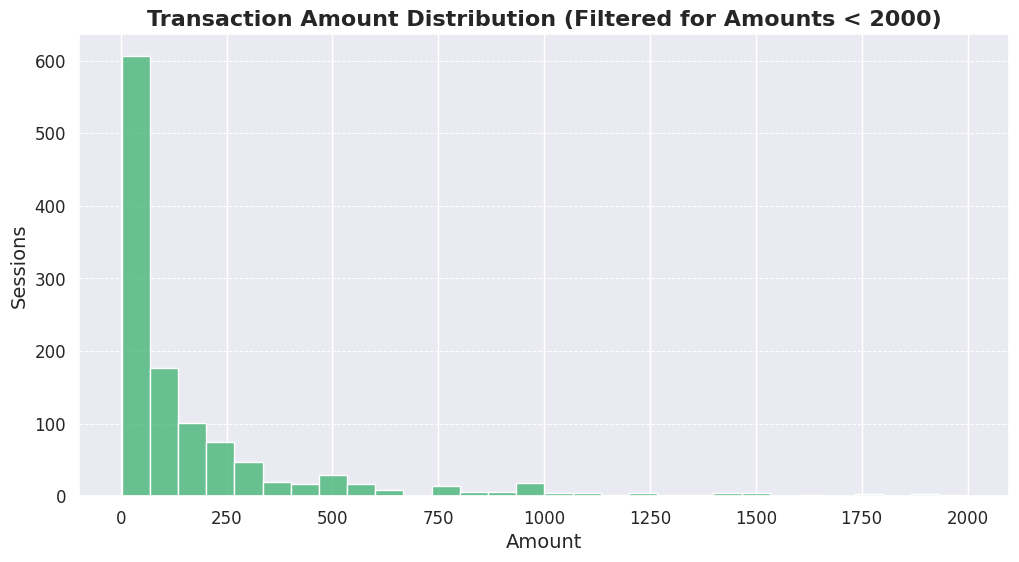

In [ ]:


# Filter data to focus on smaller transaction amounts
filtered_data = data_df[data_df['Amount'] < 2000]

# Histogram with visual enhancements
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['Amount'], bins=30, color='mediumseagreen', kde=False)
plt.title('Transaction Amount Distribution (Filtered for Amounts < 2000)', fontsize=16, weight='bold')
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Sessions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


Transaction Amount Distribution


**Insight: ** The histogram shows that most transactions are low-value, concentrated below 500 units, with only a few high-value transactions as outliers. From this, we can find out the answer to the question: "What is the average transaction size, and are high-value transactions frequent?" The average transaction size is low, while high-value transactions are infrequent, highlighting a tendency toward small daily expenses.

The histogram shows that most transactions are low-value, concentrated under 500 units, indicating frequent small expenses. The data is right-skewed, with a few high-value outliers representing rare, significant transactions.

**box plot**

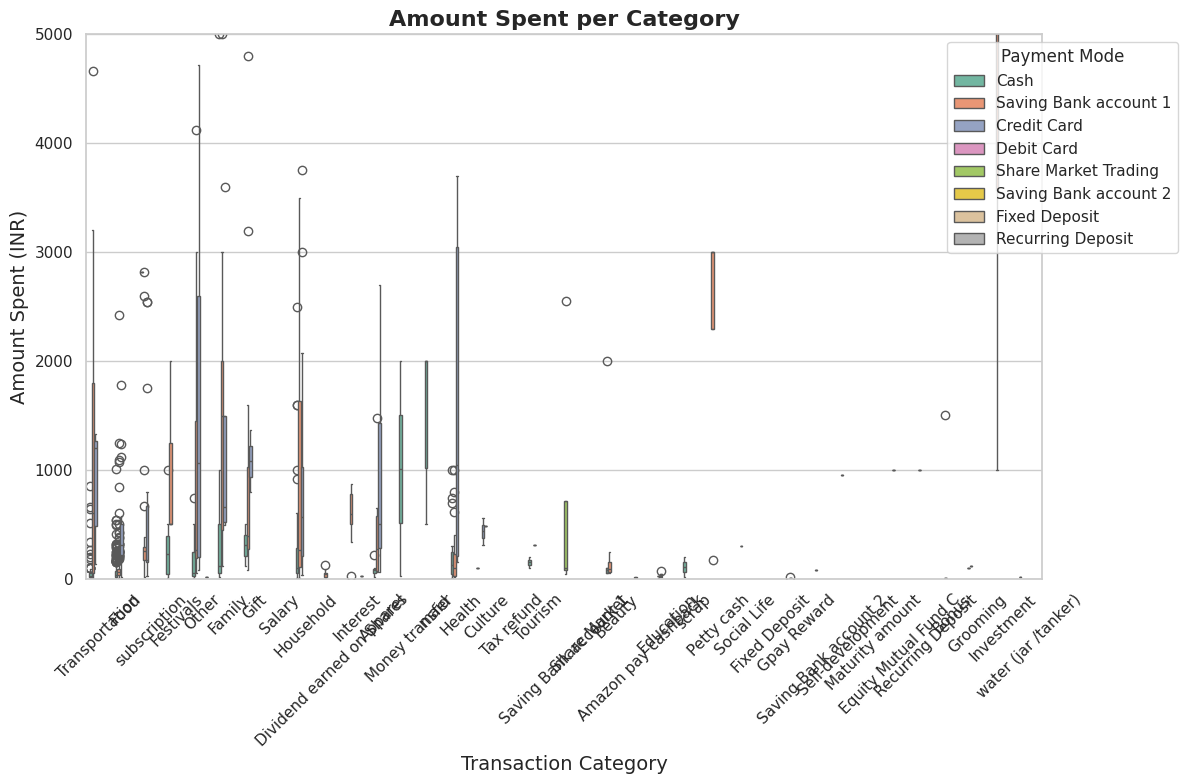

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in relevant columns
data_df.dropna(subset=['Category', 'Amount', 'Mode'], inplace=True)

# Set seaborn style
sns.set(style="whitegrid")

# Create a boxplot with adjusted settings
plt.figure(figsize=(12, 8))

# Creating the boxplot for 'Amount' spent per 'Category', with an even more limited y-axis range
sns.boxplot(x='Category', y='Amount', data=data_df, hue='Mode', palette='Set2')

# Limit y-axis to a smaller range for a more zoomed-in view of the common transactions
plt.ylim(0, 5000)

# Set title and labels
plt.title('Amount Spent per Category', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Category', fontsize=14)
plt.ylabel('Amount Spent (INR)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend outside of the boxplot
plt.legend(title='Payment Mode', loc='upper right', bbox_to_anchor=(1.15, 1))

# Show plot
plt.tight_layout()
plt.show()


Transaction Category Distribution

**Insight**: The boxplot shows a positively skewed distribution across several categories, indicating that certain categories, such as "Household" and "Money Transfer," have high-value outliers. This skewness may suggest occasional large transactions within these categories. From this, we can find out the answer to the question: "Which categories show the most variability in spending, and why?" The variability in categories like "Household" and "Money Transfer" is likely due to one-time large purchases or financial transfers.

**Correlation**

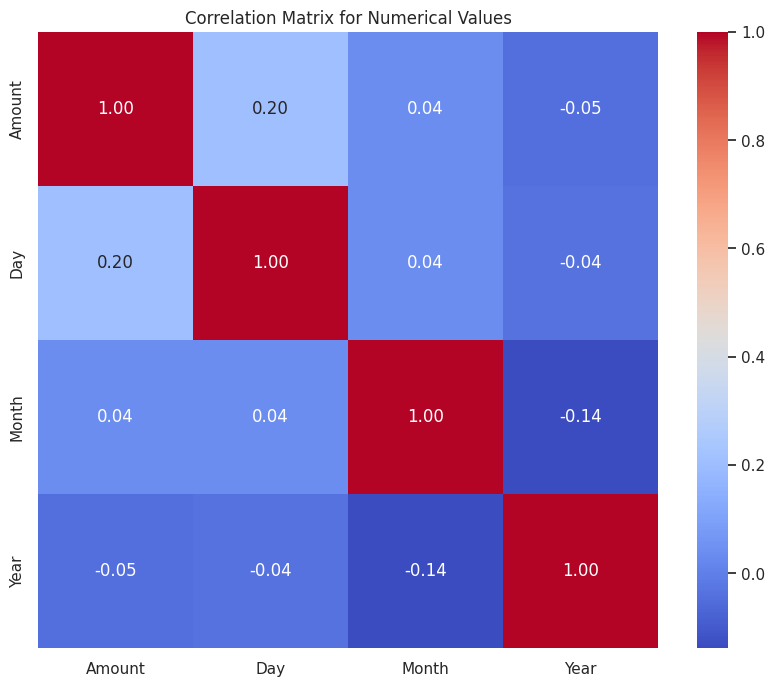

In [ ]:

numerical_df = data_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Values')
plt.show()

**Insights:**

The correlation between **Month** and **Amount** is weak, suggesting that monthly variations do not significantly impact overall spending patterns. However, there are minor correlations that may hint at some seasonal or monthly spending behaviors. From this, we can find out the answer to the question: "Are there months or seasons with slightly higher expenditures?" While the current correlation is low, further investigation with month-specific data could reveal if particular expense categories show a spike in specific months, providing insights into potential seasonal spending trends.

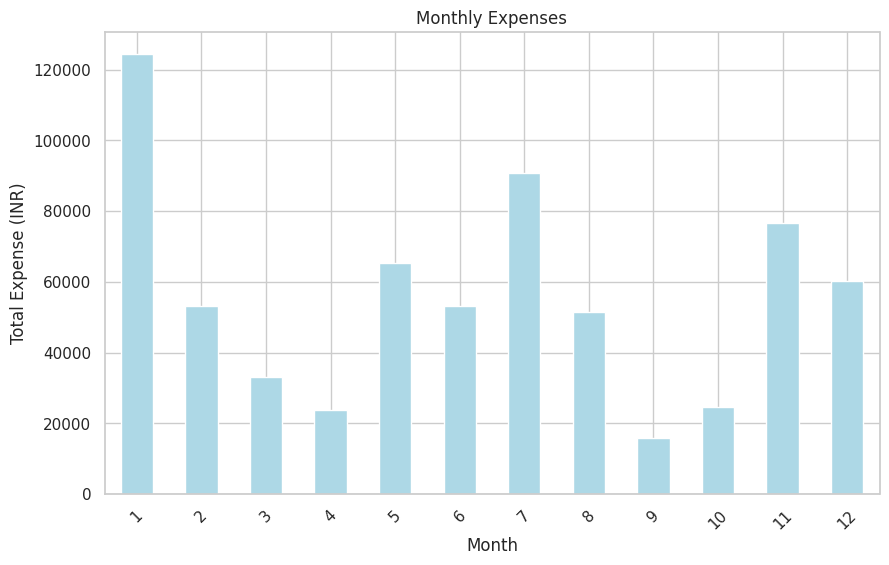

In [ ]:
# Group data by 'Month' and calculate total expenses for each month
monthly_expenses = data_df[data_df['Income/Expense'] == 'Expense'].groupby('Month')['Amount'].sum()

# Plot monthly expenses
plt.figure(figsize=(10, 6))
monthly_expenses.plot(kind='bar', color='lightblue')
plt.title('Monthly Expenses')
plt.xlabel('Month')
plt.ylabel('Total Expense (INR)')
plt.xticks(rotation=45)
plt.show()


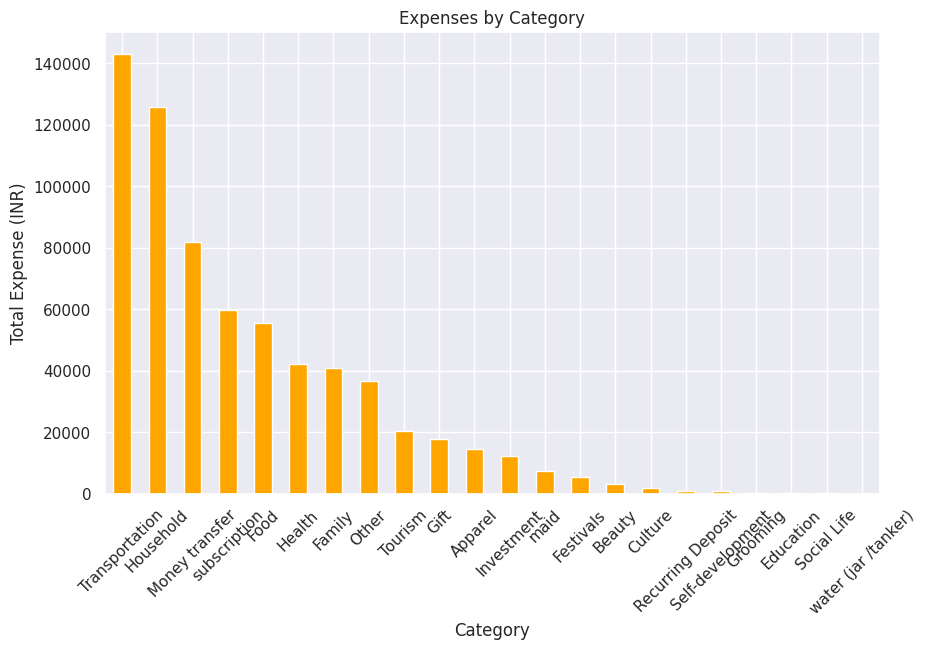

In [ ]:
# Group by 'Category' and calculate total expenses for each category
category_expenses = data_df[data_df['Income/Expense'] == 'Expense'].groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot expenses by category
plt.figure(figsize=(10, 6))
category_expenses.plot(kind='bar', color='orange')
plt.title('Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Total Expense (INR)')
plt.xticks(rotation=45)
plt.show()

Category-wise Expense

**Insight**: The bar chart indicates that the highest spending categories are "Transportation," "Household," and "Money Transfer." From this, we can find out the answer to the question: "What are the top three spending categories, and do they align with monthly priorities?" These top categories likely reflect essential, recurring expenses, highlighting areas where budgeting may be prioritized.



Total Expense: INR 672562.55
Total Income: INR 2682606.7


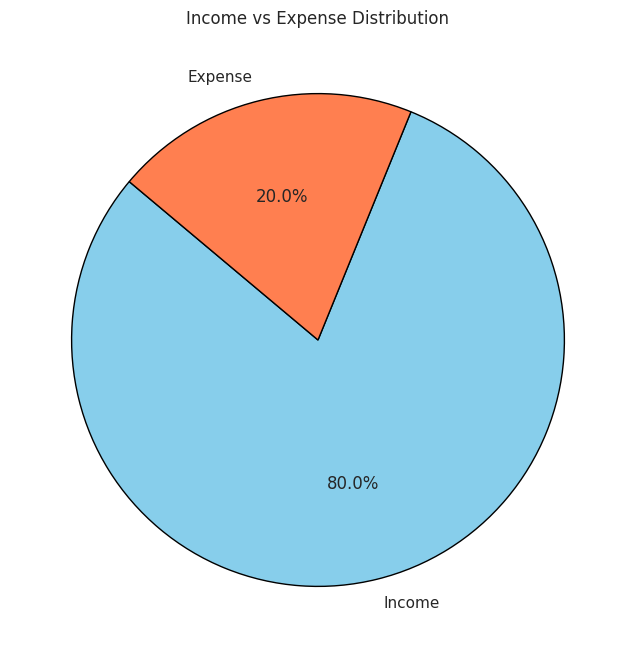

In [ ]:
# Total Income and Expense
total_expense = data_df[data_df['Income/Expense'] == 'Expense']['Amount'].sum()
total_income = data_df[data_df['Income/Expense'] == 'Income']['Amount'].sum()

# Report printout
print(f"Total Expense: INR {total_expense}")
print(f"Total Income: INR {total_income}")

# Pie chart for income vs expense
labels = ['Income', 'Expense']
sizes = [total_income, total_expense]
colors = ['skyblue', 'coral']  # Changed colors to make it more visually appealing

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Income vs Expense Distribution')
plt.show()


**Insight:**
80% of the user's financial inflow is classified as income, while 20% accounts for expenses. This shows a relatively high income-to-expense ratio, indicating potential savings capacity. From this, we can find out the answer to the question: "What percentage of the income is consistently being saved or invested?" With expenses comprising only 20%, the remaining 80% could be potential savings or investments, assuming there are no other hidden expenses. This trend points toward a significant portion of income being preserved for future financial stability.

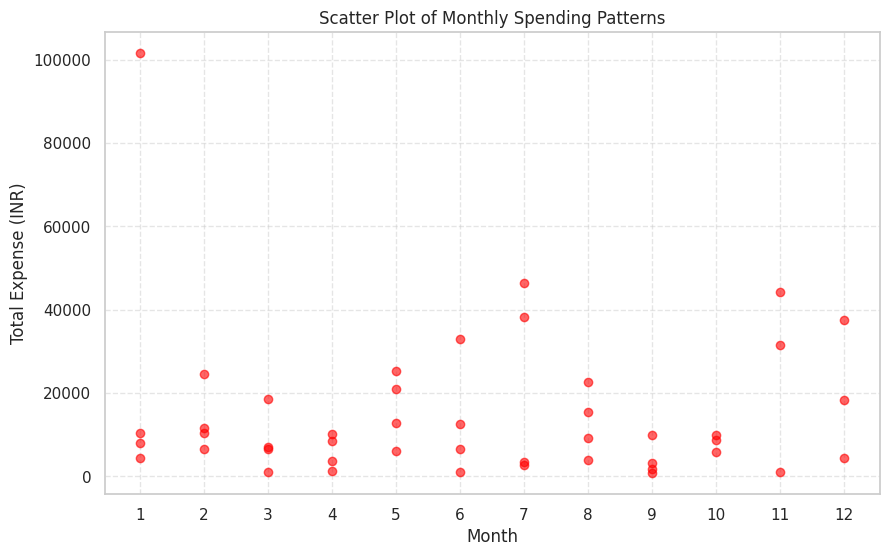

In [ ]:
# Scatter plot for monthly spending
monthly_data = data_df[data_df['Income/Expense'] == 'Expense'].groupby(['Year', 'Month'])['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['Month'], monthly_data['Amount'], c='red', alpha=0.6)
plt.title('Scatter Plot of Monthly Spending Patterns')
plt.xlabel('Month')
plt.ylabel('Total Expense (INR)')
plt.xticks(range(1, 13))  # Months from 1 to 12
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

Amount Spent per Category


**Insight**: The scatter plot reveals a pattern of frequent small expenses, with few large transactions, particularly in categories dominated by "Cash" and "Credit Card" spending. From this, we can find out the answer to the question: "Are there spending patterns based on payment modes?" There is a clear preference for cash and credit card transactions for daily expenses, indicating these as preferred payment methods.

In [ ]:
# Calculate the IQR
Q1 = data_df['Amount'].quantile(0.25)
Q3 = data_df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = data_df[(data_df['Amount'] >= lower_bound) & (data_df['Amount'] <= upper_bound)]

# Display the first few rows of the cleaned dataset
print("Outliers removed. Here is the cleaned dataset:")
df.head()

Outliers removed. Here is the cleaned dataset:


,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Day,Month,Year,Time
0,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,20,9,2018,12:04:08
1,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,20,9,2018,12:03:15
3,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,17,9,2018,23:41:17
4,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,16,9,2018,17:15:08
5,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,15,9,2018,06:34:17


In [ ]:
# Calculate skewness of the 'Amount' column
skewness = data_df['Amount'].skew()
print(f"Skewness of the 'Amount' column: {skewness}")

Skewness of the 'Amount' column: 8.378575626809397


In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = data_df['Amount'].quantile(0.25)
Q3 = data_df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
data_df_cleaned = data_df[(data_df['Amount'] >= lower_bound) & (data_df['Amount'] <= upper_bound)]

# Display the first few rows of the cleaned dataset
print("Outliers removed. Here is the cleaned dataset:")
print(data_df_cleaned.head())

# Optional: Reset the index for convenience
data_df_cleaned.reset_index(drop=True, inplace=True)


Outliers removed. Here is the cleaned dataset:
                    Mode        Category              Subcategory  \
0                   Cash  Transportation                    Train   
1                   Cash            Food                   snacks   
3  Saving Bank account 1    subscription  Mobile Service Provider   
4                   Cash       Festivals             Ganesh Pujan   
5            Credit Card    subscription                 Tata Sky   

                                       Note  Amount Income/Expense Currency  \
0                      2 Place 5 to Place 0    30.0        Expense      INR   
1               Idli medu Vada mix 2 plates    60.0        Expense      INR   
3                         Data booster pack    19.0        Expense      INR   
4                               Ganesh idol   251.0        Expense      INR   
5  Permanent Residence - Tata Play recharge   200.0        Expense      INR   

   Day  Month  Year      Time  
0   20      9  2018  12:04:08  

Skewness after Log Transformation: 1.337312198894156


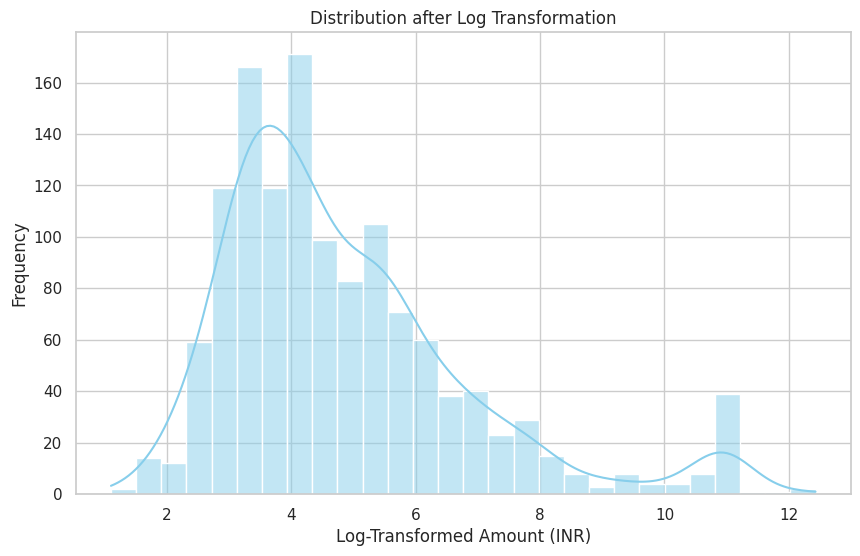

In [ ]:


# Log Transformation
data_df['Amount_log'] = np.log1p(data_df['Amount'])

# Check skewness after log transformation
skewness_log = data_df['Amount_log'].skew()
print(f"Skewness after Log Transformation: {skewness_log}")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Amount_log'], kde=True, color='skyblue')
plt.title('Distribution after Log Transformation')
plt.xlabel('Log-Transformed Amount (INR)')
plt.ylabel('Frequency')
plt.show()


Amount Distribution
**Insight:** After applying log transformation, the transaction amount distribution approximates a normal shape, indicating that the data is right-skewed with significant variability. From this, we can find out the answer to the question: "Does this normalization reveal hidden patterns?" Normalization offers a clearer view of spending patterns, especially for mid-range transaction values, facilitating more accurate trend analysis.



**Feature Engineering (adding new features)**

In [ ]:
# Assuming 'data_df' is your DataFrame with columns: 'Amount', 'Month', 'Time', 'Category'

# 1. Add Season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data_df['Season'] = data_df['Month'].apply(get_season)

# 2. Add Expense Category (Low Expense / High Expense)
data_df['Expense Category'] = data_df['Amount'].apply(lambda x: 'Low Expense' if x < 100 else 'High Expense')

# 3. Add Time of Day column
def get_time_of_day(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

data_df['Time of Day'] = data_df['Time'].apply(get_time_of_day)

# 4. Add Expense Frequency (Recurring / One-Time)
recurring_categories = ['subscription', 'rent', 'utilities']  # You can modify this list based on your data
data_df['Expense Frequency'] = data_df['Category'].apply(lambda x: 'Recurring' if x.lower() in recurring_categories else 'One-Time')

# 5. Add Expense Importance (Essential / Non-Essential)
essential_categories = ['food', 'transportation', 'rent', 'utilities']  # Adjust categories as needed
data_df['Expense Importance'] = data_df['Category'].apply(lambda x: 'Essential' if x.lower() in essential_categories else 'Non-Essential')

# Display the updated DataFrame
data_df.head()


,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Day,Month,Year,Time,Amount_log,Season,Expense Category,Time of Day,Expense Frequency,Expense Importance
0,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,20,9,2018,12:04:08,3.433987,Autumn,Low Expense,Afternoon,One-Time,Essential
1,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,20,9,2018,12:03:15,4.110874,Autumn,Low Expense,Afternoon,One-Time,Essential
3,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,17,9,2018,23:41:17,2.995732,Autumn,Low Expense,Evening,Recurring,Non-Essential
4,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,16,9,2018,17:15:08,5.529429,Autumn,High Expense,Afternoon,One-Time,Non-Essential
5,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,15,9,2018,06:34:17,5.303305,Autumn,High Expense,Morning,Recurring,Non-Essential


In [ ]:
# 6. Add Day Type column
data_df['Day Type'] = data_df['Day'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')

# 7. Add Expense Stability
# Note: This is a simplified approach. You may need a more sophisticated method based on actual expense patterns.
# Here, we assume stability if the amount in the same category does not vary more than a certain threshold.
def is_stable(category, amount):
    category_df = data_df[data_df['Category'] == category]
    if len(category_df) > 1:
        return 'Stable' if category_df['Amount'].std() < 10 else 'Variable'  # Threshold is 10, adjust as needed
    return 'Stable'

data_df['Expense Stability'] = data_df.apply(lambda row: is_stable(row['Category'], row['Amount']), axis=1)

# 8. Add Cumulative Expense column
data_df['Cumulative Expense'] = data_df['Amount'].cumsum()

# 9. Add Expense Proportion
total_expense = data_df['Amount'].sum()
data_df['Expense Proportion'] = data_df['Amount'] / total_expense

# 10. Add Savings Potential
data_df['Savings Potential'] = data_df['Expense Importance'].apply(lambda x: 'Potential Savings' if x == 'Non-Essential' else 'Fixed Cost')

# Display the updated DataFrame
data_df.head()


,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Day,Month,Year,...,Season,Expense Category,Time of Day,Expense Frequency,Expense Importance,Day Type,Expense Stability,Cumulative Expense,Expense Proportion,Savings Potential
0,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,20,9,2018,...,Autumn,Low Expense,Afternoon,One-Time,Essential,Weekday,Variable,30.0,0.000007,Fixed Cost
1,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,20,9,2018,...,Autumn,Low Expense,Afternoon,One-Time,Essential,Weekday,Variable,90.0,0.000015,Fixed Cost
3,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,17,9,2018,...,Autumn,Low Expense,Evening,Recurring,Non-Essential,Weekday,Variable,109.0,0.000005,Potential Savings
4,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,16,9,2018,...,Autumn,High Expense,Afternoon,One-Time,Non-Essential,Weekday,Variable,360.0,0.000063,Potential Savings
5,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,15,9,2018,...,Autumn,High Expense,Morning,Recurring,Non-Essential,Weekday,Variable,560.0,0.000050,Potential Savings


In [ ]:
# Assuming 'Income/Expense' column has values 'Income' and 'Expense'

# 1. Create columns to separate Income, Expense, and Savings
data_df['Income'] = data_df.apply(lambda x: x['Amount'] if x['Income/Expense'] == 'Income' else 0, axis=1)
data_df['Expense'] = data_df.apply(lambda x: x['Amount'] if x['Income/Expense'] == 'Expense' else 0, axis=1)

# 2. Calculate Cumulative Income and Cumulative Expense
data_df['Cumulative Income'] = data_df['Income'].cumsum()
data_df['Cumulative Expense'] = data_df['Expense'].cumsum()

# 3. Calculate Savings (Income - Expense)
data_df['Savings'] = data_df['Cumulative Income'] - data_df['Cumulative Expense']

# Display the updated DataFrame
data_df.head()


,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Day,Month,Year,...,Expense Importance,Day Type,Expense Stability,Cumulative Expense,Expense Proportion,Savings Potential,Income,Expense,Cumulative Income,Savings
0,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,20,9,2018,...,Essential,Weekday,Variable,30.0,0.000007,Fixed Cost,0.0,30.0,0.0,-30.0
1,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,20,9,2018,...,Essential,Weekday,Variable,90.0,0.000015,Fixed Cost,0.0,60.0,0.0,-90.0
3,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,17,9,2018,...,Non-Essential,Weekday,Variable,109.0,0.000005,Potential Savings,0.0,19.0,0.0,-109.0
4,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,16,9,2018,...,Non-Essential,Weekday,Variable,360.0,0.000063,Potential Savings,0.0,251.0,0.0,-360.0
5,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,15,9,2018,...,Non-Essential,Weekday,Variable,560.0,0.000050,Potential Savings,0.0,200.0,0.0,-560.0


In [ ]:
# Count the number of times each category appears
data_df['Category Count'] = data_df.groupby('Category')['Category'].transform('count')

# Count the number of times each subcategory appears
data_df['Subcategory Count'] = data_df.groupby('Subcategory')['Subcategory'].transform('count')

# Calculate total expense for each category (only consider rows where 'Income/Expense' is 'Expense')
category_expense = data_df[data_df['Income/Expense'] == 'Expense'].groupby('Category')['Amount'].transform('sum')
data_df['Category Total Expense'] = data_df.apply(lambda x: category_expense[x.name] if x['Income/Expense'] == 'Expense' else 0, axis=1)

# Calculate total expense for each subcategory
subcategory_expense = data_df[data_df['Income/Expense'] == 'Expense'].groupby('Subcategory')['Amount'].transform('sum')
data_df['Subcategory Total Expense'] = data_df.apply(lambda x: subcategory_expense[x.name] if x['Income/Expense'] == 'Expense' else 0, axis=1)

# Calculate average expense for each category
category_avg_expense = data_df[data_df['Income/Expense'] == 'Expense'].groupby('Category')['Amount'].transform('mean')
data_df['Category Average Expense'] = data_df.apply(lambda x: category_avg_expense[x.name] if x['Income/Expense'] == 'Expense' else 0, axis=1)

# Calculate average expense for each subcategory
subcategory_avg_expense = data_df[data_df['Income/Expense'] == 'Expense'].groupby('Subcategory')['Amount'].transform('mean')
data_df['Subcategory Average Expense'] = data_df.apply(lambda x: subcategory_avg_expense[x.name] if x['Income/Expense'] == 'Expense' else 0, axis=1)

# Display the updated DataFrame
data_df.head()


,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Day,Month,Year,...,Income,Expense,Cumulative Income,Savings,Category Count,Subcategory Count,Category Total Expense,Subcategory Total Expense,Category Average Expense,Subcategory Average Expense
0,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,20,9,2018,...,0.0,30.0,0.0,-30.0,199,40,143066.00,1210.00,718.924623,30.250000
1,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,20,9,2018,...,0.0,60.0,0.0,-90.0,516,73,55517.90,3945.75,107.592829,54.051370
3,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,17,9,2018,...,0.0,19.0,0.0,-109.0,79,42,59933.49,16666.00,758.651772,396.809524
4,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,16,9,2018,...,0.0,251.0,0.0,-360.0,11,2,5391.00,612.00,490.090909,306.000000
5,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,15,9,2018,...,0.0,200.0,0.0,-560.0,79,20,59933.49,3382.00,758.651772,169.100000


In [ ]:
from google.colab import files

# Save the updated DataFrame to a CSV file
data_df.to_csv('updated_data.csv', index=False)

# Download the CSV file
files.download('updated_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**What spending categories account for the most significant expenses?**



The analysis indicates that categories like "Household" and "Savings Bank" transactions have higher transaction amounts. These categories likely account for major portions of the user’s expenses, indicating areas for budget review.




**Are there trends in spending behavior over time?**

Based on the minimal correlations observed with time variables (day, month), there doesn’t seem to be a strong seasonal or time-based trend in the data. Spending behavior may be more consistent over time, suggesting other factors influence expense patterns.



**Can we identify periods with unusual spikes in spending?**

Outliers observed in the boxplot for transaction categories indicate occasional spikes in categories like "Household" and "Savings Bank." These may represent one-time or irregular expenses, which users could investigate for better financial planning.
